## **Import Libraries**
* numpy digunakan pada model prediction
* os digunakan untuk mendapatkan path folder dan file
* shutil digunakan untuk menyalin file
* matplotlib.pyplot digunakan untuk menampilkan grafik
* matplotlib.image digunakan untuk mengakses file gambar
* tensorflow digunakan untuk modeling
* random digunakan untuk melakukan random
* magic digunakan untuk mendapatkan resolusi gambar
* ImageDataGenerator digunakan untuk augmentasi

In [1]:
import numpy as np
import os
import shutil
import matplotlib.pyplot as plt
import matplotlib.image as img
import tensorflow as tf
import random
import magic
from keras_preprocessing.image import ImageDataGenerator

## **Exploratory Data Analysis**
melihat informasi dataset berupa jumlah data, jumlah label, serta jumlah data pada masing-masing label

In [2]:
root_path = r'D:\Datasets'
source_path = os.path.join(root_path,
                           'Rice_Image_Dataset')

rice_dataset = {}

for label in os.listdir(source_path):
    rice_dataset[label] = [file for file in os.listdir(os.path.join(source_path, label))]

In [3]:
print(
    f'amount of data\t\t: {sum([len(files) for files in rice_dataset.values()])}',
    f'amount of label\t\t: {len(rice_dataset.keys())}',
    sep = '\n' + '-'*60 + '\n'
)

print('-'*60)

for key, value in rice_dataset.items():
    print(f'amount of {key.lower()}\t: {len(value)}')
    print('-'*60)

amount of data		: 75000
------------------------------------------------------------
amount of label		: 5
------------------------------------------------------------
amount of arborio	: 15000
------------------------------------------------------------
amount of basmati	: 15000
------------------------------------------------------------
amount of ipsala	: 15000
------------------------------------------------------------
amount of jasmine	: 15000
------------------------------------------------------------
amount of karacadag	: 15000
------------------------------------------------------------


In [4]:
random_label = list(rice_dataset.keys())[random.randrange(len(list(rice_dataset.keys())))]

image_resolution = magic.from_file(os.path.join(root_path,
                                                source_path,
                                                random_label,
                                                rice_dataset[random_label][random.randrange(len(rice_dataset[random_label]))])).split(',')[7].strip()

print(f'Image Resolution: {image_resolution} pixels')

Image Resolution: 250x250 pixels


## **Data Visualization**

### Bar Chart

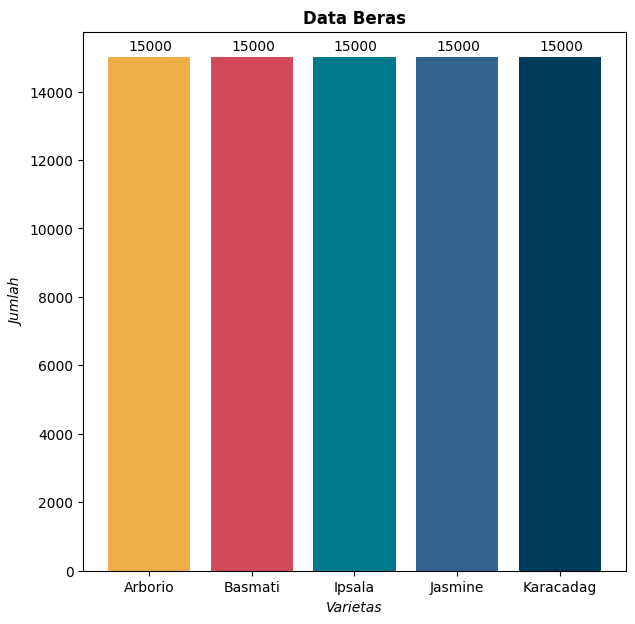

In [5]:
plt.figure(figsize = (7,7))
plt.title('Data Beras', fontweight='bold')
plt.xlabel('Varietas', fontstyle='oblique')
plt.ylabel('Jumlah', fontstyle='oblique')
plt.bar(rice_dataset.keys(),
        [len(files) for files in rice_dataset.values()],
        color=['#edae49', '#d1495b', '#00798c', '#30638e', '#003d5b'])

for index, value in enumerate([len(files) for files in rice_dataset.values()]):
    plt.text(index - .2, value + 200, str(value))

plt.show()

### Pie Chart

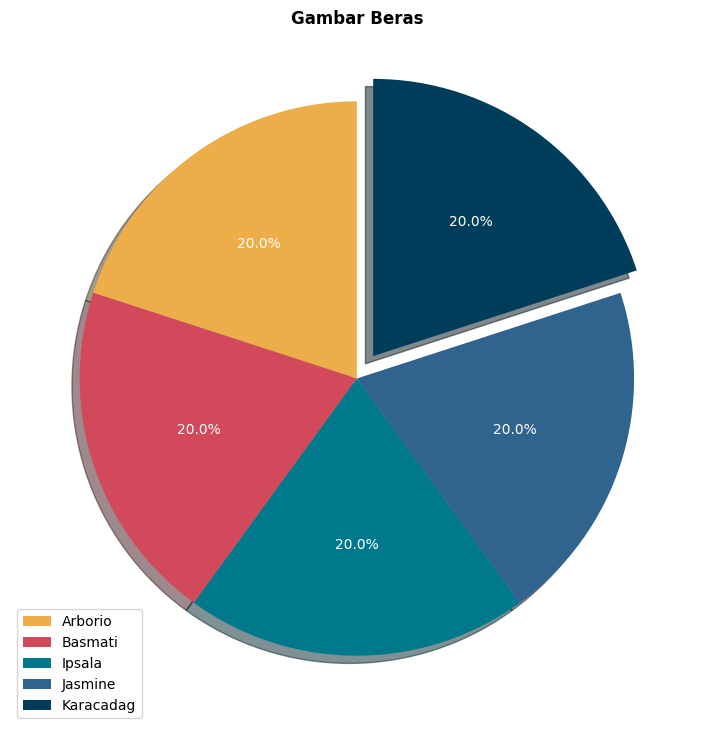

In [6]:
plt.figure(figsize = (9,9))
plt.pie([len(files) for files in rice_dataset.values()],
        labels = rice_dataset.keys(),
        startangle = 90,
        autopct = '%.1f%%',
        explode = [0, 0, 0, 0, 0.1],
        shadow = True,
        colors=['#edae49', '#d1495b', '#00798c', '#30638e', '#003d5b'],
        textprops={'color':"w"})
plt.title('Gambar Beras', fontweight='bold')
plt.legend()
plt.show()

### Image Sample

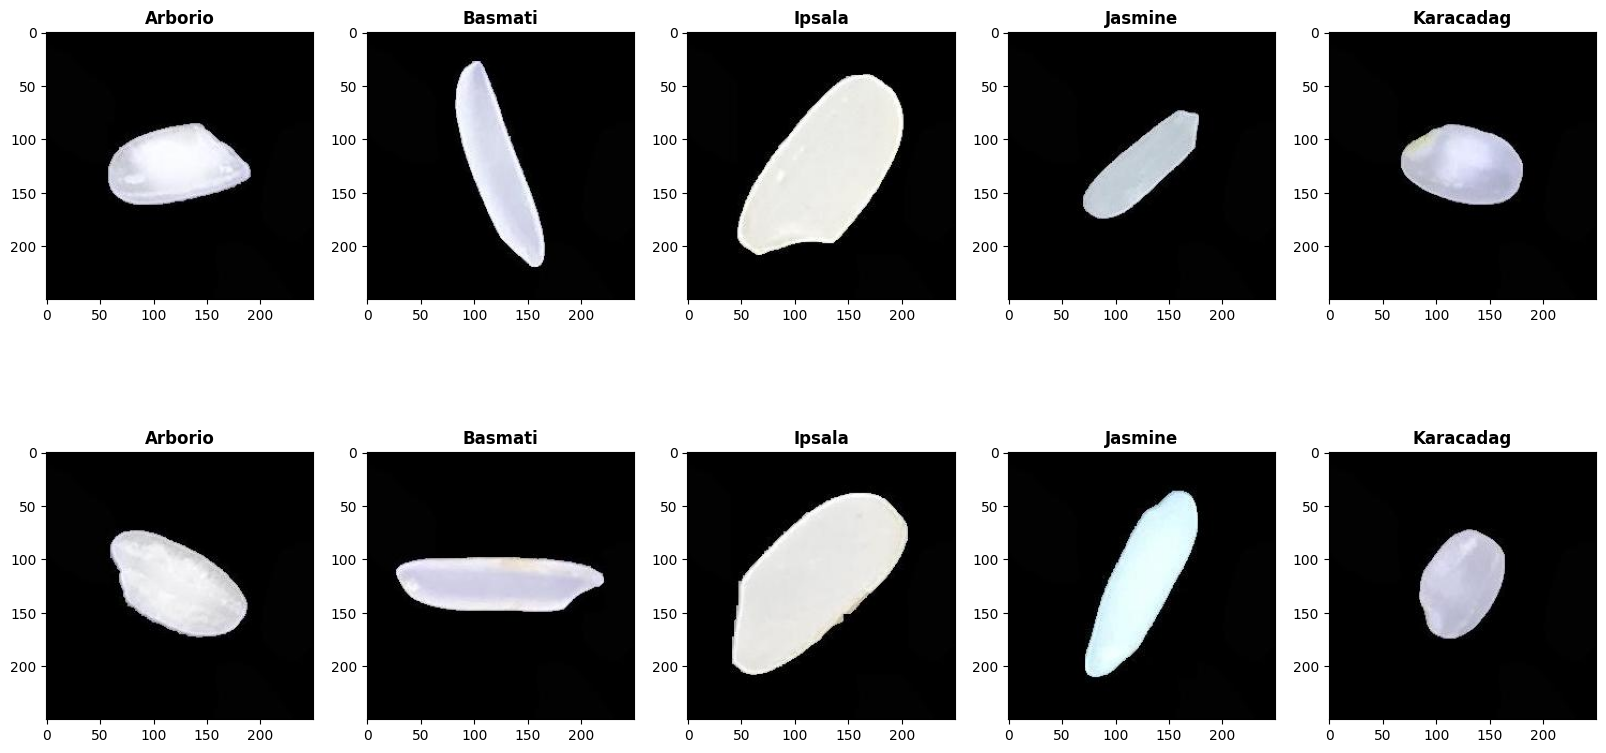

In [7]:
fig = plt.figure(figsize = (20, 10))

image_position = 0

for j in range(2):
    for index, folder in enumerate(rice_dataset.keys()):
        image_position += 1
        fig.add_subplot(2, 5, image_position)
        plt.title(folder, fontweight='bold')
        plt.imshow(img.imread(os.path.join(source_path, folder, rice_dataset[folder][random.randint(0,15000)])))

## **Split Dataset**
langkah-langkah split dataset:
1. membuat folder train, val, dan test
2. menentukan split ratio (train 90%, val 9%, test 1%)
3. menyalin file

In [8]:
target_path = os.path.join(root_path, 'Splitted_Rice_Image_Dataset')

### Create Folders

In [ ]:
if (os.path.isdir(os.path.join(target_path, 'train'))):
    print(f'path {os.path.join(target_path, "train")} already exists')
else:
    os.makedirs(os.path.join(target_path, 'train'))
    for label in rice_dataset.keys():
        os.makedirs(os.path.join(target_path, f'train/{label}'))

if (os.path.isdir(os.path.join(target_path, 'val'))):
    print(f'path {os.path.join(target_path, "val")} already exists')
else:
    os.makedirs(os.path.join(target_path, 'val'))
    for label in rice_dataset.keys():
        os.makedirs(os.path.join(target_path, f'val/{label}'))

if (os.path.isdir(os.path.join(target_path, 'test'))):
    print(f'path {os.path.join(target_path, "test")} already exists')
else:
    os.makedirs(os.path.join(target_path, 'test'))
    for label in rice_dataset.keys():
        os.makedirs(os.path.join(target_path, f'test/{label}'))

### Split Ratio

In [ ]:
for label in rice_dataset.keys():
    rice_dataset[label] = random.sample(rice_dataset[label], len(rice_dataset[label]))

file_train = {}; file_val = {}; file_test = {}

for label in rice_dataset.keys():
    file_train[label] = rice_dataset[label][:-1500]
    file_val[label] = rice_dataset[label][-1500:-150]
    file_test[label] = rice_dataset[label][-150:]

### Copy Files

In [ ]:
for label in file_train.keys():
    for data in file_train[label]:
        shutil.copyfile(
            os.path.join(source_path, label, data),
            os.path.join(target_path, f'train/{label}', data)
        )

    for data in file_val[label]:
        shutil.copyfile(
            os.path.join(source_path, label, data),
            os.path.join(target_path, f'val/{label}', data)
        )

    for data in file_test[label]:
        shutil.copyfile(
            os.path.join(source_path, label, data),
            os.path.join(target_path, f'test/{label}', data)
        )

## **Augmentation**
melakukan augmentasi data berupa:
- normalisasi piksel gambar
- mengubah resolusi gambar menjadi 100x100
- mengubah ruang warna gambar menjadi skala abu-abu

In [10]:
train_path = r'D:\Datasets\Splitted_Rice_Image_Dataset\train'
val_path = r'D:\Datasets\Splitted_Rice_Image_Dataset\val'
test_path = r'D:\Datasets\Splitted_Rice_Image_Dataset\test'

In [11]:
image_data_generator = ImageDataGenerator(
    rescale=1./255
)

In [12]:
train_generator = image_data_generator.flow_from_directory(
    train_path,
    target_size=(100, 100),
    color_mode='grayscale',
    batch_size=128,
    shuffle=True,
    class_mode='categorical'
)

val_generator = image_data_generator.flow_from_directory(
    val_path,
    target_size=(100, 100),
    color_mode='grayscale',
    batch_size=128,
    shuffle=True,
    class_mode='categorical'
)

test_generator = image_data_generator.flow_from_directory(
    test_path,
    target_size=(100, 100),
    color_mode='grayscale',
    batch_size=128,
    shuffle=True,
    class_mode='categorical'
)

Found 67500 images belonging to 5 classes.
Found 6750 images belonging to 5 classes.
Found 750 images belonging to 5 classes.


## **Modeling**
tahapan modeling:
1. pembuatan arsitektur model
2. melakukan konfigurasi model
3. melatih model
4. mengevaluasi model
5. memvisualisasikan model
5. melihat prediksi model
6. menyimpan model

### Model Architecture


In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=[100, 100, 1]),
    tf.keras.layers.MaxPooling2D(3, 3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense (Dense)               (None, 32)                524320    
                                                                 
 dense_1 (Dense)             (None, 5)                 165       
                                                                 
Total params: 524,645
Trainable params: 524,645
Non-trainable params: 0
__________________________________________________

### Model Configuration
model menggunakan pengoptimal Adam, fungsi loss categorical_crossentropy, dan metrics accuracy

In [14]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

### Train Model
pelatihan model menggunakan epochs sebanyak 20. pelatihan model juga menggunakan Callback yang akan menghentikan iterasi pelatihan model jika akurasi model sudah melebihi 0.98 dan validasi akurasi melebihi 0.97. batas iterasi pelatihan model adalah 20.

#### Create Callback class

In [15]:
class EarlyStopping(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.98 and logs.get('val_accuracy') > 0.97):
            self.model.stop_training = True

#### EarlyStopping Class Instantiation

In [16]:
early_stopping = EarlyStopping()

#### Train

In [17]:
result = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

Epoch 1/20
528/528 [==============================] - 377s 713ms/step - loss: 0.1523 - accuracy: 0.9493 - val_loss: 0.1141 - val_accuracy: 0.9572
Epoch 2/20
528/528 [==============================] - 84s 158ms/step - loss: 0.0791 - accuracy: 0.9728 - val_loss: 0.0811 - val_accuracy: 0.9693
Epoch 3/20
528/528 [==============================] - 84s 159ms/step - loss: 0.0674 - accuracy: 0.9768 - val_loss: 0.0703 - val_accuracy: 0.9763
Epoch 4/20
528/528 [==============================] - 87s 164ms/step - loss: 0.0628 - accuracy: 0.9785 - val_loss: 0.0726 - val_accuracy: 0.9739
Epoch 5/20
528/528 [==============================] - 82s 155ms/step - loss: 0.0582 - accuracy: 0.9799 - val_loss: 0.0653 - val_accuracy: 0.9776
Epoch 6/20
528/528 [==============================] - 80s 151ms/step - loss: 0.0538 - accuracy: 0.9810 - val_loss: 0.0668 - val_accuracy: 0.9767


### Evaluate Model

In [18]:
model.evaluate(test_generator)

6/6 [==============================] - 1s 98ms/step - loss: 0.0740 - accuracy: 0.9800


[0.07404488325119019, 0.9800000190734863]

### Model Visualization

#### Accuracy

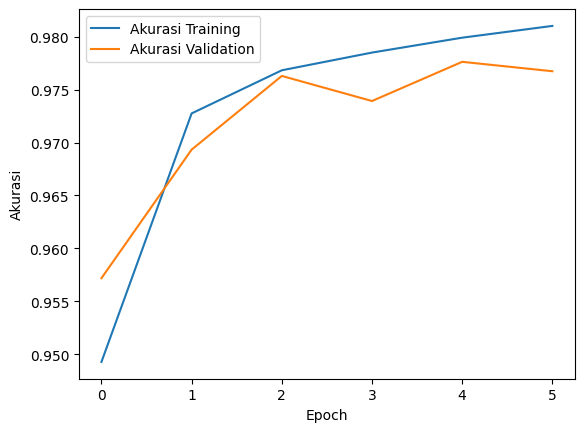

In [19]:
plt.plot(result.history['accuracy'], label='Akurasi Training')
plt.plot(result.history['val_accuracy'], label='Akurasi Validation')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.show()

#### Loss

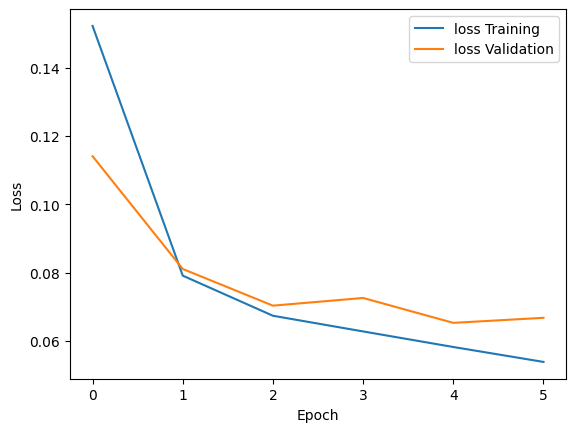

In [20]:
plt.plot(result.history['loss'], label='loss Training')
plt.plot(result.history['val_loss'], label='loss Validation')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

### Model Prediction

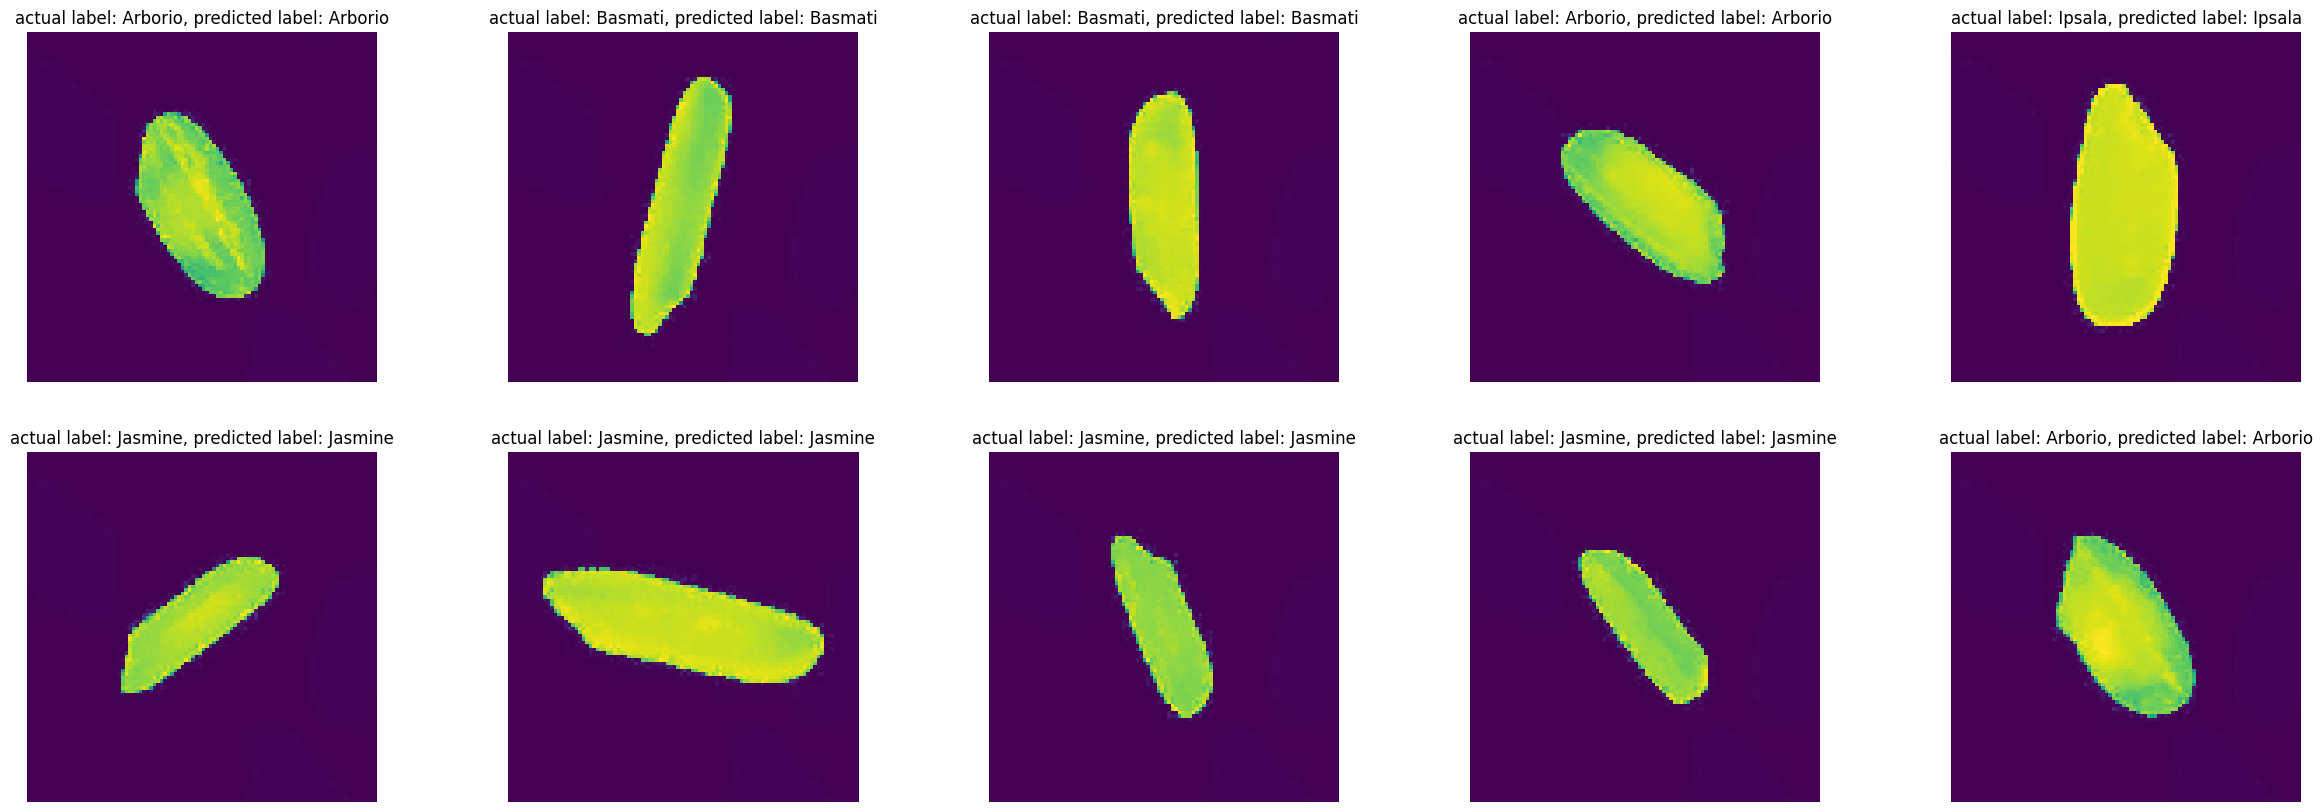

In [21]:
img, label = next(iter(test_generator))

plt.figure(figsize=(30,10))
for i in range(10) :
    actual_label = list(rice_dataset.keys())[np.argmax(label[i])]
    plt.subplot(2,5,i+1)
    plt.axis('off')
    predicted_label = np.argmax(model.predict(img[i][None,...]))
    plt.imshow(tf.squeeze(img[i]))
    plt.title(f'actual label: {actual_label}, predicted label: {list(rice_dataset.keys())[predicted_label]}')

### Save Model

In [22]:
model.save('model/rice_type_classifier.h5')